Elijah Burns,
Phys434,
Homework2

In [53]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

**1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?**

It is more probable to roll sevens, where the two dice sum to seven, because there are more ways to make seven with two dice than there are to make 2. To roll 2, both dice must show a 1. Since the dice are independent variables, we know the probability of getting dice1 to be a 1 and dice2 to be a 1 is the P(A)P(B). There are six possiblities for values of a single dice so P(A)=P(B)=1/6. And the probability of rolling a 2 is (1/6)^2 or 1/36. 

There are 6 ways to make 7, 1+6, 2+5,3+4, and the reverse of the combinations, so the probability of rolling a seven is 6/36 or 1/6. 

In other words, you are 6 times more likely to roll a 7 than to roll a 2.

**2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).**

In [111]:
n = [1,2,3,4,5,6]
v = [1/6,1/6,1/6,1/6,1/6,1/6]
p = []
conv = np.convolve(n,v, mode='full')

for a in range(6):
    for b in range(6):
        val = n[a]+n[b]
        p.append(val) 

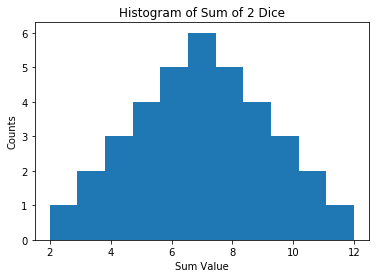

In [63]:
plt.hist(p, density = False, bins=11)
plt.xlabel('Sum Value')
plt.ylabel('Counts')
plt.title('Histogram of Sum of 2 Dice')
plt.show()

**3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.**

In [69]:
print('Mean of the disbtribution of the sum of 2 dice',np.mean(p))
print('Variance of the distribution of the sum of 2 dice',np.var(p))

Mean of the disbtribution of the sum of 2 dice 7.0
Variance of the distribution of the sum of 2 dice 5.833333333333333


**4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.**

Yes this graph of the average of 10 dice is still a Gaussian distribution. Since the initial distribution was Gaussian, and all you have done to change the results are averaging over more dice, and the variables are still independent, the resulting distribution must be Gaussian as well.

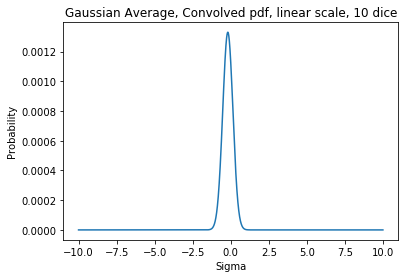

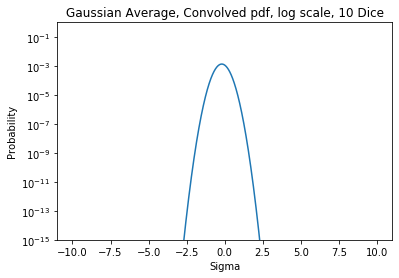

In [129]:
var = np.linspace(-10,10,2000)

dist = scipy.stats.norm.rvs(0,1)

base = scipy.stats.norm.pdf(dist,var)
base = base/sum(base)
comb=base

for i in range (2,10):
    comb = np.convolve(comb,base,mode='full')
    
plt.title('Gaussian Average, Convolved pdf, linear scale, 10 dice')
cx = np.linspace(-10,10,len(comb))
plt.plot(cx,comb)
plt.ylabel('Probability')
plt.xlabel('Sigma')
plt.show()


plt.title('Gaussian Average, Convolved pdf, log scale, 10 Dice')
plt.plot(cx, comb)
plt.ylim([1e-15,1])
plt.yscale('log')
plt.ylabel('Probability')
plt.xlabel('Sigma')
plt.show()

**5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.**

Thanks for the Central Limit Theorem, we know that as you sum or average distributions enough times, the distributions start to look more and more like normal (Gaussian) distributions. This works for any kind of distribution, so if you start with a distribution that is already normal, you can't approach a more normal distribution, so the resulting sum or average distribution of an initially Gaussian distribution will stay as a normal distribution. 

The resulting distribution of the sum becomes wider, so the standard deviation increases.
The resulting distribution of the average becomes narrower, so the standard deviation decreases.

This is an important result because if you *average* a signal over time, as we have just seen the standard deviation will get smaller and smaller, which will help decrease the uncertainty (or increase the certainty) in the data leading to a more confident measurement of the signal you are looking at.